<a href="https://colab.research.google.com/github/stefanir0129/CapstoneProject-Modul2/blob/main/Capstone_Project_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latar Belakang
Sebuah perusahaan yang bergerak di bidang data, ingin merekrut *data scientist*. Perusahaan ini melakukan pelatihan dan melakukan perekrutan ke orang-orang yang berhasil menyelesaikan pelatihan tersebut. Banyak orang mendaftar ke pelatihan tersebut, tapi tidak semua yang ikut pelatihan berniat untuk pindah pekerjaan.   


## Pernyataan Masalah
Perusahaan ingin mengetahui **kandidat mana saja yang ingin bekerja di perusahaan mereka setelah training atau sedang mencari pekerjaan baru**. Informasi ini akan membantu perusahaan untuk mengurangi ongkos dan waktu training, meningkatkan kualitas dan membantu dalam mengelompokkan kandidat dalam training.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik kandidat yang ingin pindah pekerjaan, terutama dibandingkan peserta yang tidak ingin pindah bekerja?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?taskId=3015).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada 14 kolom di dalam dataset hr_analytics, yaitu:  

* enrollee_id : ID unik untuk tiap kandidat
* city: kode untuk kota
* city_ development _index : index perkembangan untuk kota (*scaled*)
* gender: jenis kelamin dari kandidat
* relevent_experience: pengalaman kerja kandidat yang relevan
* enrolled_university: tipe kelas di kuliah yang diikuti, jika ada
* education_level: pendidikan terakhir kandidat
* major_discipline : jurusan pendidikan kandidat
* experience: lama pengalaman bekerja kandidat dalam tahun
* company_size: jumlah karyawan di perusahaan tempat kandidat sedang bekerja
* company_type : tipe perusahaan tempat kandidat sedang bekerja
* lastnewjob: berapa tahun sejak kandidat bekerja di perusahaan yang sekarang
* training_hours: *training* yang sudah diselesaikan dalam jam
* target: 0 – tidak mencari pekerjaan baru, 1 – sedang mencari pekerjaan baru  


Berikut 5 baris teratas dan terbawah dari dataset hr_analitycs.

In [ ]:
df=pd.read_csv('hr_analytics.csv')
display(df.head(),df.tail())

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset hr_analytics.

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (19158, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-n

In [ ]:
display(df.describe(), df.describe(include='object'))

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [ ]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,enrollee_id,19158,"[8949, 29725, 11561, 33241, 666, 21651, 28806, 402, 27107, 699, 29452, 23853, 25619, 5826, 8722, 6588, 4167, 5764, 2156, 11399, 31972, 19061, 6491, 7041, 22767, 14505, 17139, 28476, 21538, 10408, 14928, 22293, 4324, 26966, 26494, 4866, 12726, 10164, 8612, 24659, 2547, 13854, 31654, 13643, 5590, 22452, 9006, 25987, 4476, 25103, 5568, 2195, 30533, 28512, 1023, 12253, 25296, 13238, 13478, 18578, 29975, 26516, 24690, 8433, 9572, 5878, 25695, 9645, 12730, 4830, 20970, 17271, 12731, 10908, 29117, 3686, 22683, 22134, 31765, 31449, 5987, 21762, 22070, 25413, 5902, 28403, 30937, 28751, 29290, 32401, 19128, 29036, 16869, 10497, 18099, 12081, 7364, 11184, 7016, 8695, ...]"
1,city,123,"[city_103, city_40, city_21, city_115, city_162, city_176, city_160, city_46, city_61, city_114, city_13, city_159, city_102, city_67, city_100, city_16, city_71, city_104, city_64, city_101, city_83, city_105, city_73, city_75, city_41, city_11, city_93, city_90, city_36, city_20, city_57, city_152, city_19, city_65, city_74, city_173, city_136, city_98, city_97, city_50, city_138, city_82, city_157, city_89, city_150, city_70, city_175, city_94, city_28, city_59, city_165, city_145, city_142, city_26, city_12, city_37, city_43, city_116, city_23, city_99, city_149, city_10, city_45, city_80, city_128, city_158, city_123, city_7, city_72, city_106, city_143, city_78, city_109, city_24, city_134, city_48, city_144, city_91, city_146, city_133, city_126, city_118, city_9, city_167, city_27, city_84, city_54, city_39, city_79, city_76, city_77, city_81, city_131, city_44, city_117, city_155, city_33, city_141, city_127, city_62, ...]"
2,city_development_index,93,"[0.92, 0.7759999999999999, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926, 0.8270000000000001, 0.843, 0.804, 0.855, 0.887, 0.91, 0.884, 0.924, 0.6659999999999999, 0.5579999999999999, 0.923, 0.794, 0.754, 0.939, 0.55, 0.865, 0.698, 0.893, 0.7959999999999999, 0.866, 0.682, 0.802, 0.579, 0.878, 0.897, 0.949, 0.925, 0.8959999999999999, 0.836, 0.693, 0.769, 0.775, 0.903, 0.555, 0.727, 0.64, 0.516, 0.743, 0.899, 0.915, 0.6890000000000001, 0.895, 0.89, 0.847, 0.527, 0.7659999999999999, 0.738, 0.647, 0.795, 0.74, 0.701, 0.493, 0.84, 0.691, 0.735, 0.742, 0.479, 0.722, 0.921, 0.848, 0.856, 0.898, 0.83, 0.73, 0.68, 0.725, 0.556, 0.448, 0.763, 0.745, 0.645, 0.7879999999999999, 0.78, 0.512, 0.7390000000000001, 0.563, 0.518, 0.8240000000000001, 0.487, 0.649, 0.7809999999999999, 0.625, 0.807, 0.664]"
3,gender,3,"[Male, nan, Female, Other]"
4,relevent_experience,2,"[Has relevent experience, No relevent experience]"
5,enrolled_university,3,"[no_enrollment, Full time course, nan, Part time course]"
6,education_level,5,"[Graduate, Masters, High School, nan, Phd, Primary School]"
7,major_discipline,6,"[STEM, Business Degree, nan, Arts, Humanities, No Major, Other]"
8,experience,22,"[>20, 15, 5, <1, 11, 13, 7, 17, 2, 16, 1, 4, 10, 14, 18, 19, 12, 3, 6, 9, 8, 20, nan]"
9,company_size,8,"[nan, 50-99, <10, 10000+, 5000-9999, 1000-4999, 10/49, 100-500, 500-999]"


Secara umum, kita bisa melihat bahwa:
* dataset hr_analytics memiliki 19 kolom dan 19.158 baris
* beberapa kolom, yaitu, `gender`, `enrolled_university`, `education_level`, `major_discipline`, `company_size`, `company_type` dan `last_new_job` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `enrollee_id` berisikan id unik untuk tiap peserta, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `experience` memiliki data tipe object. Dari penjelasannya, kolom ini seharusnya berisikan data numerik. Mari kita cek lebih detil.
* kolom `training_hours` memiliki range data yang cukup besar, dari 1-336. Dengan asumsi training dilakukam full time - 8 jam sehari, maka butuh waktu 42 hari untuk mencapai 336 hari. Angka ini masih cukup masuk akal, sehingga tidak perlu dilakukan apa-aoa terhadap kolom ini.
* ada salah ketik di kolom `company_size`. Nilai 10/49 seharusnya 10-49.
* beberapa data kategorik ordinal, bisa dibuatkan kolom baru berdasarkan ranking kategorinya untuk memudahkan analisis (opsional)

### Missing Value

In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

enrollee_id               0.000000 
city                      0.000000 
city_development_index    0.000000 
gender                    23.530640
relevent_experience       0.000000 
enrolled_university       2.014824 
education_level           2.401086 
major_discipline          14.683161
experience                0.339284 
company_size              30.994885
company_type              32.049274
last_new_job              2.207955 
training_hours            0.000000 
target                    0.000000 
dtype: float64

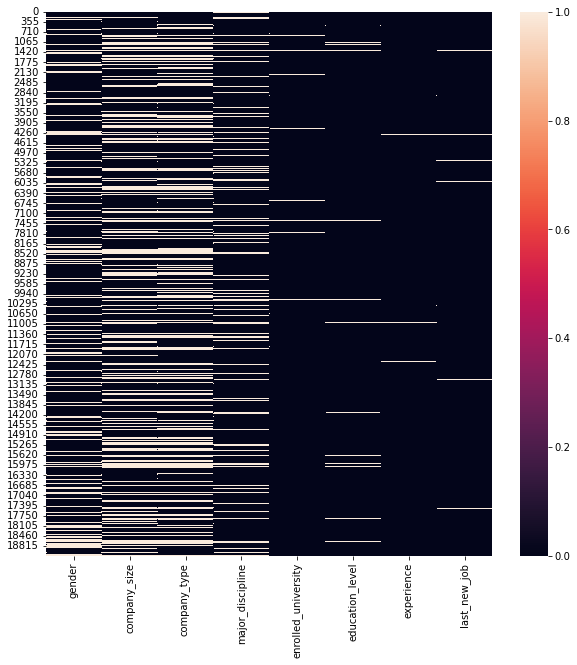

In [ ]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['gender','company_size','company_type','major_discipline','enrolled_university','education_level','experience','last_new_job']].isna())

Secara garis besar:  
* *missing value* di kolom `gender`, `experience`, `company_size` dan `company_type` memiliki proporsi yang cukup tinggi (>10%), dengan missing value di kolom `company_type` mencapai 32.05%.
* *missing value* di kolom `company_size` dan `company_type` memiliki sebaran yang terlihat berkaitan, jika data di `company_size` kosong, maka kemungkinan besar data di `company_type` juga kosong.  

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 32%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  

#### `company_size` dan `company_type`
Sebelum memulai, mari kita ubah data '10/49' di kolom `company_size`menjadi '10-49'.

In [ ]:
df['company_size'].value_counts()


50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999      877 
5000-9999    563 
Name: company_size, dtype: int64

In [ ]:
df.loc[df['company_size']=='10/49','company_size']='10-49'

In [ ]:
df['company_size'].value_counts()
#data 10/49 sudah menjadi 10-49

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999      877 
5000-9999    563 
Name: company_size, dtype: int64

Dari analisis di atas, kita sudah tau bahwa *missing value* `company_size` dan `company_type` saling berkaitan. Maka, kita akan memutuskan cara pengisian kedua kolom ini secara bersamaan.  

In [ ]:
# jumlah missing value di kolom 'company_size' dan 'company_type'
df[['company_size', 'company_type']].isna().sum()

company_size    5938
company_type    6140
dtype: int64

Terdapat 5.938 data kosong di kolom `company_size` dan 6.140 di kolom `company_type`.
Pertama, kita akan coba melihat, apakah data-data kosong di kolom `company_size` dan `company_type` berasal dari kandidat yg memang sedang tidak bekerja/masih kuliah?

In [ ]:
# jumlah kandidat dengan data kosong di 'company_size' dan 'company_type' berdasarkan 'enrolled_university'
display(df[df['company_type'].isna()]['enrolled_university'].value_counts(),
df[df['company_size'].isna()]['enrolled_university'].value_counts())

no_enrollment       3556
Full time course    1993
Part time course    349 
Name: enrolled_university, dtype: int64

no_enrollment       3307
Full time course    2079
Part time course    315 
Name: enrolled_university, dtype: int64

Memang ada sebagian kandidat yang sedang berkuliah *full time*. Kita bisa berasumsi bahwa kandidat yang sedang berkuliah *full time*, tentunya sedang tidak bekerja, sehingga wajar mereka tidak mengisi data, yang berkaitan dengan perusahaan. Untuk itu, kita bisa **membuat kategory baru, _not available_, untuk mengisi data kosong di kolom `company_size` dan `company_type` dari kandidat yang sedang kuliah _full time_**



In [ ]:
# mengisi data kosong dengan isi 'Full time course' pada 'enrolled_university' di kolom 'company_size' dan 'company_type'
df.loc[(df['company_size'].isna())&(df['company_type'].isna())&(df['enrolled_university']=='Full time course'),['company_size', 'company_type']]='not available'

In [ ]:
# jumlah data kosong setelah pengisian
df[['company_size', 'company_type']].isna().sum()

company_size    4092
company_type    4294
dtype: int64

Sekarang, tersisa 4.092 data kosong di kolom `company_size` dan 4.294 di `company_type`.

Untuk, sisa datanya, kita coba pendekatan lain. Mari kita cross tabulasi dari `company size` berdasarkan kolom `city` dan `company type` berdasarkan `company size`.

In [ ]:
# proporsi perusahaan berdasarkan  `company type` dan `city`
pd.crosstab(df['city'],df['company_type'],normalize='index')

company_type,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,not available
city,,,,,,,
city_1,0.000000,0.047619,0.000000,0.000000,0.095238,0.619048,0.238095
city_10,0.039474,0.092105,0.039474,0.000000,0.092105,0.671053,0.065789
city_100,0.010989,0.038462,0.010989,0.005495,0.093407,0.670330,0.170330
city_101,0.166667,0.000000,0.018519,0.000000,0.018519,0.611111,0.185185
city_102,0.023148,0.032407,0.018519,0.000000,0.046296,0.777778,0.101852
...,...,...,...,...,...,...,...
city_93,0.100000,0.150000,0.000000,0.000000,0.050000,0.600000,0.100000
city_94,0.181818,0.000000,0.000000,0.000000,0.090909,0.727273,0.000000
city_97,0.050633,0.012658,0.012658,0.012658,0.063291,0.746835,0.101266


In [ ]:
# proporsi perusahaan berdasarkan  `company type` dan `company size``
pd.crosstab(df['company_type'],df['company_size'],normalize='index')

company_size,10-49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10,not available
company_type,,,,,,,,,
Early Stage Startup,0.293333,0.045000,0.000000,0.000000,0.181667,0.003333,0.000000,0.476667,0.0
Funded Startup,0.193970,0.215075,0.000000,0.000000,0.391960,0.054271,0.000000,0.144724,0.0
NGO,0.064646,0.351515,0.147475,0.074747,0.155556,0.074747,0.058586,0.072727,0.0
Other,0.106195,0.176991,0.132743,0.141593,0.159292,0.097345,0.061947,0.123894,0.0
Public Sector,0.052058,0.182809,0.199758,0.181598,0.140436,0.105327,0.095642,0.042373,0.0
Pvt Ltd,0.096695,0.194772,0.107959,0.184784,0.228562,0.066093,0.043779,0.077356,0.0
not available,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [ ]:
# modus company_size berdasarkan company_type
df.groupby(['company_type']).describe(include='object')['company_size']['top']

company_type
Early Stage Startup    <10          
Funded Startup         50-99        
NGO                    100-500      
Other                  100-500      
Public Sector          1000-4999    
Pvt Ltd                50-99        
not available          not available
Name: top, dtype: object

Dari hasil cross tabulasi di atas, dan berdasarkan *domain knowledge*, kita akan mencoba mengisi sisa data kosong di kedua kolom dengan pendekatan berikut:
* **mengisi `company size` berdasarkan kolom `city`**. Secara logika, kota-kota dengan populasi besar akan cenderung memiliki perusahaan dengan jumlah karyawan yang banyak juga. Kita tidak bisa membuktikan asumsi ini dengan data, karena tidak ada datanya, namun, dari hasil **cross** tabulasi di atas, bisa dilihat bahwa proporsi `company size` cukup acak berdasarkan kotanya.

* setelah kolom `company size` terisi, kita akan **mengisi `company type` berdasarkan `company size`**. Dari hasil **cross** tabulasi, bisa dilihat bahwa tiap-tiap tipe perusahaan memiliki kecenderungan jumlah karyawan yang bervariasi, contoh, perusahaan startup cenderung memiliki jumlah karyawan di bawah 100, sementara perusahaan *public sector* cenderung memiliki karyawan berjumlah > 1000.  

Pengisian data dengan pendekatan ini diharapkan tidak mengganggu distribusi data yang ada.

In [ ]:
# proporsi kategori2 di kolom `company type` dan `company size`
display(df['company_size'].value_counts()/df['company_size'].dropna().shape[0],
df['company_type'].value_counts()/df['company_type'].dropna().shape[0])

50-99            0.204633
100-500          0.170649
10000+           0.134010
not available    0.122528
10-49            0.097637
1000-4999        0.088145
<10              0.086818
500-999          0.058211
5000-9999        0.037369
Name: company_size, dtype: float64

Pvt Ltd                0.660455
not available          0.124193
Funded Startup         0.067344
Public Sector          0.064249
Early Stage Startup    0.040568
NGO                    0.035051
Other                  0.008140
Name: company_type, dtype: float64

In [ ]:
# index data kosong di kolom company_size
index_nan=df.loc[df['company_size'].isna()].index

In [ ]:
# mengisi data kosong di kolom company_size dengan modus berdasarkan city
df['company_size']=df.groupby('city')['company_size'].apply(lambda x: x.fillna(x.describe(include='object')['top']))


In [ ]:
# pengecekkan sebaran data yang mengisi data kosong di kolom company_size
df.loc[index_nan]['company_size'].value_counts()

50-99            2285
10000+           1047
not available    351 
100-500          312 
10-49            67  
<10              13  
1000-4999        12  
Name: company_size, dtype: int64

In [ ]:
# index data kosong di kolom company_type
index_nan=df.loc[df['company_type'].isna()].index

In [ ]:
# mengisi data kosong di kolom company_type dengan modus berdasarkan company_size
df['company_type']=df.groupby('company_size')['company_type'].apply(lambda x: x.fillna(x.describe(include='object')['top']))

In [ ]:
# pengecekkan sebaran data yang mengisi data kosong di kolom company_type
df.loc[index_nan]['company_type'].value_counts()

Pvt Ltd          3982
not available    308 
Name: company_type, dtype: int64

In [ ]:
# proporsi data di kolom company_size dan company_type setelah pengisian data kosong
display(df['company_size'].value_counts()/df.shape[0], df['company_type'].value_counts()/df.shape[0])
# dapat dilihat ada perubahan proporsi, tapi masih bisa diterima

50-99            0.280196
10000+           0.160038
100-500          0.150485
not available    0.114678
10-49            0.080280
1000-4999        0.069945
<10              0.068953
500-999          0.045777
5000-9999        0.029387
Name: company_size, dtype: float64

Pvt Ltd                0.720221
not available          0.112433
Funded Startup         0.052250
Public Sector          0.049849
Early Stage Startup    0.031475
NGO                    0.027195
Other                  0.006316
Name: company_type, dtype: float64

In [ ]:
#pengecekkan ulang data kosong
df[['company_size', 'company_type']].isna().sum()

company_size    5
company_type    5
dtype: int64

Bisa dilihat, ternyata masih ada 5 data kosong setelah pengisian. Mari kita cek.

In [ ]:
df[df['company_size'].isna()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3035,5373,city_140,0.856,Male,No relevent experience,no_enrollment,High School,NaN,1,NaN,NaN,never,26,0.0
13204,22169,city_31,0.807,NaN,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,4,37,0.0
15909,20619,city_31,0.807,Female,No relevent experience,no_enrollment,Masters,STEM,5,NaN,NaN,1,94,0.0
16725,14899,city_31,0.807,Male,No relevent experience,no_enrollment,Masters,STEM,10,NaN,NaN,1,30,1.0
17358,5924,city_31,0.807,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,37,0.0


In [ ]:
df[df['city']=='city_31']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13204,22169,city_31,0.807,NaN,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,4,37,0.0
15909,20619,city_31,0.807,Female,No relevent experience,no_enrollment,Masters,STEM,5,NaN,NaN,1,94,0.0
16725,14899,city_31,0.807,Male,No relevent experience,no_enrollment,Masters,STEM,10,NaN,NaN,1,30,1.0
17358,5924,city_31,0.807,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,37,0.0


Kelima data yang masih kosong berasal dari 2 kota dengan semua baris di kolom `company_size` dan `company_type` tidak terisi. Karena hanya ada 5 data, dan memang tidak bisa kita isi, mari kita hapus kelima data ini.

In [ ]:
#drop 5 baris yang masin kosong di kolom company_size dan company_type
df.dropna(subset=['company_size', 'company_type'],inplace=True)

In [ ]:
# cek baris kosong, semua baris yang ada sudah terisi
df[['company_size', 'company_type']].isna().sum()

company_size    0
company_type    0
dtype: int64

Sekarang, data kosong sudah tidak ada, kita bisa membuat kolom baru berdasarkan `company_size`yang berisikan ranking dari kategorinya, untuk mempermudah analisis. Tapi, langkah tersebut tidak akan dimasukkan dalam contoh ini.

#### major_discipline & education_level
Selanjutnya, mari kita cek kolom `major_discipline` dan `education_level`. Kedua kolom ini tentunya saling berhubungan, dengan kolom `major_discipline` memiliki *missing value* sebanyak 14.68% (2813) dan `education_level` 2.4% (460).



In [ ]:
df[['major_discipline','education_level']].isna().sum()

major_discipline    2812
education_level     460 
dtype: int64

Pertama, mari kita cek, apa `education_level` dari data dengan kolom `major_discipline` yang kosong.

In [ ]:
df[df['major_discipline'].isna()]['education_level'].value_counts()

High School       2016
Primary School    308 
Graduate          22  
Masters           6   
Name: education_level, dtype: int64

Bisa dilihat bahwa mayoritas data yang kosong di kolom `major_discipline` memiliki data `education_level` 'High School' dan 'Primary School', yang memang tidak memiliki jurusan. Kita bisa mengisi data kosong di kolom `major_discipline` yang berisi 'High School' dan 'Primary School' di kolom `education_level` dengan nilai 'not available'.

In [ ]:
# mengisi data kosong di kolom `major_discipline` yang berisi 'High School' dan 'Primary School' di kolom `education_level` dengan 'not available'
df.loc[(df['major_discipline'].isna())&(df['education_level'].isin(['High School','Primary School'])),'major_discipline']='not available'

In [ ]:
#cek sisa data kosong
df['major_discipline'].isna().sum()

488

In [ ]:
#cek jumlah data kosong di 'major_discipline' yang tidak kosong di 'education_level'
df[(df['major_discipline'].isna())& ~(df['education_level'].isna())].shape

(28, 14)

Setelah pengisian di atas, masih ada 488 data kosong yang tersisa di kolom `major_discipline`, kebanyakkan dari data tersebut (460) juga memiliki data kosong di kolom `education_level`. Kita bisa hapus data-data ini, karena belum ada cara yang sesuai untuk mengisi `education_level` dan tidak seharusnya kolom ini dibiarkan kosong atau 'not available'. Sisa 28 data, juga bisa kita hapus.

In [ ]:
# data kosong di kolom `education_level`
df.dropna(subset=['major_discipline','education_level'],inplace=True)

In [ ]:
#pengecekan sisa data kosong pada kolom 'major_discipline'dan'education_level'
df[['major_discipline','education_level']].isna().sum()
# sudah tidak ada data kosong

major_discipline    0
education_level     0
dtype: int64

#### Gender
Kolom gender juga memiliki cukup banyak data kosong (23%). Cukup sulit untuk menentukan gender berdasarkan fitur lain, karena itu, di kasus ini, kita akan mengisi data kosong di kolom gender dengan kelas Other, yang memang sudah termasuk sebagai kategori di kolom ini.   

Perlu dicatat bahwa kita perlu berhati-hati dalam melakukan analisis dengan fitur seperti gender, agar kebijakan yang nantinya dihasilkan tidak menjadi bias dan nantinya menyebabkan diskriminasi.

In [ ]:
df['gender'].value_counts()

Male      12965
Female    1229 
Other     182  
Name: gender, dtype: int64

In [ ]:
#mengisi data kosong pada kolom gender dengan kategori Other
df['gender']=df['gender'].fillna('Other')

In [ ]:
df['gender'].value_counts()

Male      12965
Other     4471 
Female    1229 
Name: gender, dtype: int64

In [ ]:
# sudah tidak ada data kosong pada kolom gender
df.isna().sum()

enrollee_id               0  
city                      0  
city_development_index    0  
gender                    0  
relevent_experience       0  
enrolled_university       285
education_level           0  
major_discipline          0  
experience                53 
company_size              0  
company_type              0  
last_new_job              381
training_hours            0  
target                    0  
dtype: int64

#### enrolled_university
Selanjutnya kita akan mencoba menangani data kosong pada kolom `enrolled_university`. Kolom ini berisi keterangan tipe kelas yang sedang diikuti oleh kandidat, apakah paruh waktu, penuh waktu, atau sedang tidak berkuliah. Kolom ini memiliki 285 data kosong, sekitar 56 di antaranya berasak dari data yang `education_level`nya adalah 'High School" dan 'Primary School', yang memang bukan merupakan universitas, dan bisa kita isi datanya dengan kategori 'no_enrollment'.

In [ ]:
# education_level dari data dengan enrolled_university kosong
df[df['enrolled_university'].isna()]['education_level'].value_counts()

Graduate          170
Masters           53 
High School       47 
Primary School    9  
Phd               6  
Name: education_level, dtype: int64

In [ ]:
# mengisi data kosong pada enrolled_university yang pada kolom education_level nya berisi 'High School'atau 'Primary School'
df.loc[(df['education_level'].isin(['High School','Primary School'])) & (df['enrolled_university'].isna()),'enrolled_university']='no_enrollment'

In [ ]:
# data kosong pada enrolled_university dengan education_level 'High School'atau 'Primary School' sudah tidak ada
df[df['enrolled_university'].isna()]['education_level'].value_counts()

Graduate    170
Masters     53 
Phd         6  
Name: education_level, dtype: int64

In [ ]:

df['enrolled_university'].isna().sum()/df.shape[0]*100

1.2268952585052237

Setelah kita mengisi missing value yang bisa diisi, masih ada 229 data yang kosong. Jumlah ini cukup kecil dibanding total data, hanya 1,2%, sehingga bisa kita hapus saja.

In [ ]:
#menghapus data kosong pada kolom 'enrolled_university'
df.dropna(subset= ['enrolled_university'],inplace=True)

In [ ]:
# sudah tidak ada data kosong pada kolom enrolled_university
df.isna().sum()

enrollee_id               0  
city                      0  
city_development_index    0  
gender                    0  
relevent_experience       0  
enrolled_university       0  
education_level           0  
major_discipline          0  
experience                51 
company_size              0  
company_type              0  
last_new_job              368
training_hours            0  
target                    0  
dtype: int64

#### `last_new_job` dan `experience`

Sekarang, hanya ada 2 kolom yang masih memiliki data kosong, yaitu `last_new_job` dan `experience`. Selain perlu menangani data kosong, kita juga perlu mengecek apakah kita bisa dan perlu mengganti data tipe pada kolom `experience` dari string menjadi numerical.

In [ ]:
# sebaran data pada kolom experience
df['experience'].value_counts()

>20    3204
5      1368
4      1345
3      1281
6      1162
2      1038
7      998 
9      954 
10     951 
8      781 
15     669 
11     655 
14     573 
1      508 
16     494 
12     481 
<1     481 
13     391 
17     334 
19     299 
18     275 
20     143 
Name: experience, dtype: int64

Kolom `experience` sebenarnya memiliki data berupa angka, kecuali 1 kategori, '>20', yang mengelompokkan kandidat dengan pengalaman di atas 20 tahun. Apabila kita ingin mengubah data tipe kolom ini menjadi numerik, kita perlu mengubah isi dari kategori ini menjadi angka, langkah ini bisa menyebabkan bias, terutama karena kategori '>20' memiliki cukup banyak data. Jadi kita tidak perlu mengubah data tipe pada kolom ini.

In [ ]:
#proporsi data kosong pada kolom 'last_new_job'dan 'experience'
df[['last_new_job','experience']].isna().sum()/df.shape[0]*100

last_new_job    1.996095
experience      0.276633
dtype: float64

Untuk penanganan data kosong di kedua kolom ini, karena proporsinya tidak banyak dan memang tidak ada cara yang dirasa sesuai untuk mengisi data kosongnya, maka kita bisa dihapus saja.

In [ ]:
# menghapus data kosong
df.dropna(subset=['last_new_job','experience'],inplace=True)

In [ ]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

#### enrollee_id  dan training_hours
kolom `enrollee_id` berisikan id unik untuk tiap peserta, sehingga tidak relevan dalam analisis dan bisa dihapus saja.

kolom `training_hours` juga dihapus, karena tujuan dari analisis ini adalah untuk membantu perusahaan untuk mengurangi ongkos dan waktu training, meningkatkan kualitas dan membantu dalam mengelompokkan kandidat dalam training, sehingga membandingkan lama waktu training antara kandidat yang berminat dan tidak berminat pindah kerja menjadi tidak relevan

In [ ]:
df.drop(columns=['enrollee_id','training_hours'],inplace=True)

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(18037, 12)


,dataFeatures,dataType,null,unique,uniqueSample
0,city,object,0,121,"[city_64, city_48]"
1,city_development_index,float64,0,92,"[0.789, 0.89]"
2,gender,object,0,3,"[Other, Female]"
3,relevent_experience,object,0,2,"[No relevent experience, Has relevent experience]"
4,enrolled_university,object,0,3,"[no_enrollment, Part time course]"
5,education_level,object,0,5,"[High School, Primary School]"
6,major_discipline,object,0,7,"[not available, Arts]"
7,experience,object,0,22,"[5, <1]"
8,company_size,object,0,9,"[<10, 100-500]"
9,company_type,object,0,7,"[Early Stage Startup, not available]"


Sebelum dibersihkan, kita memiliki 19,158 baris data, sekarang kita memiliki 18,037 baris. Sekitar 1000 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana karakteristik kandidat yang ingin pindah pekerjaan**.  

Analisis akan dilakukan dengan membandingkan data kandidat yang berminat untuk pindah kerja (target=1) dan tidak berminat untuk pindah kerja (target=0) berdasarkan fitur yang tersedia. karena dari 19,158 data yang kita miliki, hanya 4421 data berasal dari kandidat yang berminat untuk pindah kerja, kita perlu berhati-hati dalam membandingkan data kandidat berdasarkan target, pembandingan lebih baik dilakukan berdasarkan ratio, terutama pada data bertipe kategorikal.

In [ ]:
df['target'].value_counts()

0.0    13616
1.0    4421 
Name: target, dtype: int64

## Berdasarkan asal kota kandidat: `city` dan `city_development_index`  

Pertama, mari kita lihat bagaimana pengaruh asal kota kandidat terhadap keinginan kandidat untuk pindah kerja. Kita akan menganalisis kolom  `city` dan `city_development_index` untuk menjawab beberapa pertanyaan.

* Kota mana yang memiliki paling banyak kandidat?
* Kota mana yang memiliki paling banyak kandidat **yang berminat untuk pindah kerja**?
* Apakah ada perbedaan city_development_index dari kota asal kandidat yang berminat pindah kerja dan tidak?

In [ ]:
# 10 kota dengan jumlah kandidat paling banyak, dibagi berdasarkan target
df_ct=pd.crosstab(df['city'],df['target'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False).head(10)

target,0.0,1.0,Total
city,,,
city_103,3293,900,4193
city_21,1001,1452,2453
city_16,1306,167,1473
city_114,1139,126,1265
city_160,623,194,817
city_136,487,53,540
city_67,363,53,416
city_75,264,30,294
city_102,237,50,287


In [ ]:
# 10 kota dengan jumlah kandidat berminat (target=1) paling banyak
df_ct.sort_values(1,ascending=False).head(10)

target,0.0,1.0,Total
city,,,
city_21,1001,1452,2453
city_103,3293,900,4193
city_160,623,194,817
city_16,1306,167,1473
city_11,95,136,231
city_114,1139,126,1265
city_73,199,73,272
city_100,198,60,258
city_67,363,53,416


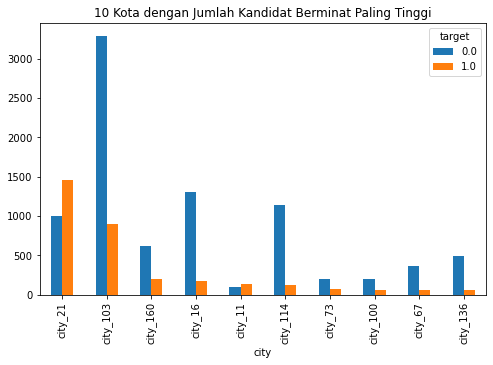

In [ ]:
df_ct.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5),
title='10 Kota dengan Jumlah Kandidat Berminat Paling Tinggi')
plt.show()

Dari hasil cross tabulasi dan grafik di atas, kita bisa melihat 10 kota dengan jumlah kandidat terbanyak, dan 10 kota dengan jumlah kandidat yang tertarik terbanyak. city_103 memiliki jumlah calon kandidat terbanyak, tapi secara jumlah kandidat yang tertarik pindah, city_21-lah yang paling tinggi. Perlu dicatat juga bahwa city_21 juga memiliki jumlah kandidat terbanyak kedua secara keseluruhan.  

Sekarang, mari kita lihat kolom berikutnya, `city_development_index`.

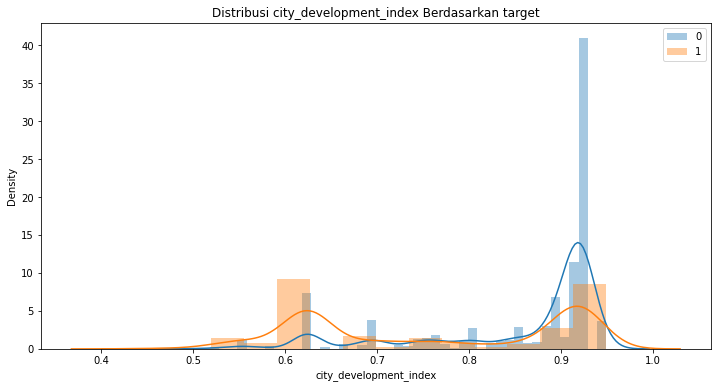

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['target']==0]['city_development_index'],label=0)
sns.distplot(df[df['target']==1]['city_development_index'],label=1)
plt.title('Distribusi city_development_index Berdasarkan target')
plt.legend()
plt.show()

Dari grafik di atas, kita bisa melihat adanya kecenderungan kandidat yang tertarik untuk pindah kerja berasal dari kota dengan development index lebih rendah. dari [wikipedia](https://en.wikipedia.org/wiki/City_development_index), kita bisa tahu bahwa city development index (CDI) diukur dendasarkan 5 hal: *infrastructure, waste, health, education and city product*. Kota dengan CDI yang lebih tinggi bisa dibilang lebih berkembang.

jadi, sangat wajar apabila kandidat yang berasal dari kota dengan CDI lebih rendah lebih ingin pindah. Sekarang, mari kita lihat, apakah perbedaan CDI antara kedua kelompok kandidat signifikan atau tidak.

In [ ]:
# cek distribusi kolom city_development_index
from scipy.stats import normaltest
stats, pval=normaltest(df['city_development_index'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


In [ ]:
# uji statistik, apakah ada perbedaan city_development_index antara kandidat yang berminat pindah kerja dan tidak
# karena distribusi data tidak normal, gunakan mann whitney
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['target']==i]['city_development_index'] for i in df['target'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Ternyata, memang ada perbedaan CDI yang signifikan antara kondidat yang ingin pindah kerja dan tidak, dengan kandidat yang ingin pindah kerja berasal dari kota dengan CDI yang lebih rendah.

Untuk lebih jelas, kita bisa melihat grafik di bawah. Kandidat yang ingin pindah kerja berasal dari kota dengan median CDI 0.75, sedangkan kandidat yang tidak ingin pindah kerja berasal dari kota dengan CDI 0.9

Tapi, jika kita telaah lebih lanjut, kita akan mendapati bahwa city_103 memiliki kontribusi cukup besar dalam penentuan median target kelas 0, sedangkan city_21 berkontribusi pada median kelas 1. Hal ini bisa terjadi karena,
1. memang kedua kota ini memiliki jumlah penduduk yang cukup padat dibanding kota-kota lain, sehingga mendominasi sebagai kota asal kandidat, atau
1. perusahaan lebih aktif melakukan perekrutan hanya di kedua kota ini saja.

Apabila opsi 2 yang terjadi, maka akan lebih baik apabila ke depannya perekrutan kandidat dilakukan secara lebih merata, sehingga kita bisa yakin bahwa hasil analisis kita terhindar dari bias.

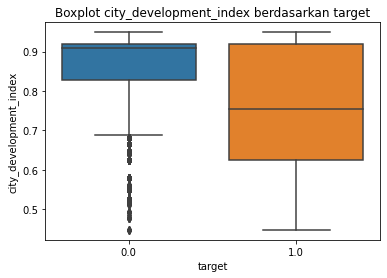

In [ ]:
sns.boxplot(y='city_development_index', x='target', data=df)
plt.title('Boxplot city_development_index berdasarkan target')
plt.show()

In [ ]:
df[df['city'].isin(['city_21','city_103'])][['city','city_development_index']].head()

,city,city_development_index
0,city_103,0.920
2,city_21,0.624
8,city_103,0.920
9,city_103,0.920
10,city_21,0.624


## Berdasarkan Edukasi:

Berikutnya, mari kita lihat fitur-fitur yang berkaitan dengan edukasi. Fitur yang terkait adalah `enrolled_university`, `education_level` dan `major_discipline`.  

Kita bisa menjawab pertanyaan-pertanyaan berikut dalam analisis kali ini:  
* Kandidat mana yang paling berminat untuk pindah kerja, kandidat yang sedang kuliah penuh waktu, paruh waktu, atau yang sedang tidak berkuliah?
* Kandidat dengan jenjang pendidikan mana yang paling berminat untuk pindah kerja?
* Dari jurusan mana kandidat paling banyak berasal? Apakah secara proporsi jurusan tersebut juga memiliki kandidat yang beminat pindah paling tinggi?

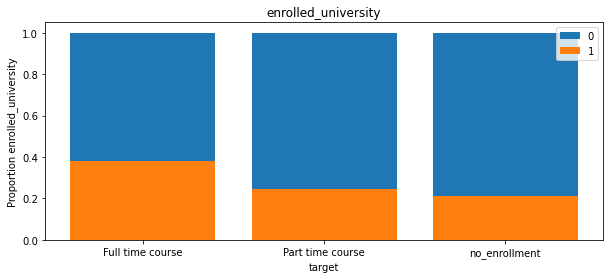

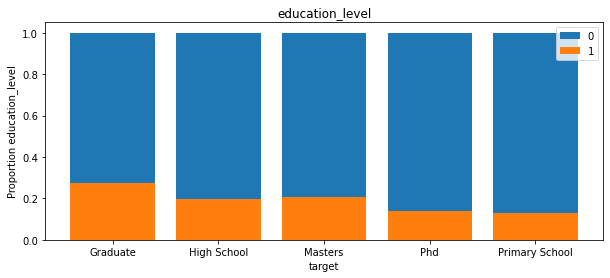

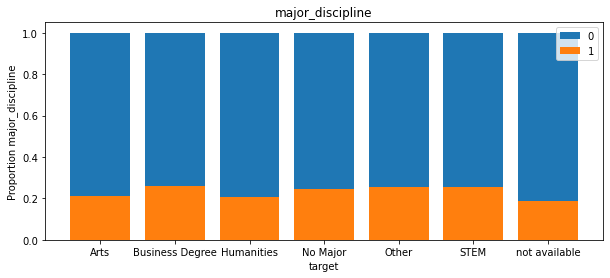

In [ ]:
for i in ['enrolled_university', 'education_level',	'major_discipline']:
    ct=pd.crosstab(df[i],df['target'],normalize='index')
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(10,4))
    plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct[1])
    plt.xlabel('target')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    plt.show()

In [ ]:
for i in ['enrolled_university', 'education_level',	'major_discipline']:
    fig=px.sunburst(df,path=[i,'target'],color='target', title=f'Proporsi Target Berdasarkan {i}')
    fig.show()

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:

* Kandidat mana yang paling berminat untuk pindah kerja, kandidat yang sedang kuliah penuh waktu, paruh waktu, atau yang sedang tidak berkuliah?  
    * kandidat yang sedang berkuliah adalah yang paling berminat untuk pindah kerja, tapi kandidat paling banyak berasal dari mereka yang sedang tidak berkuliah
* Kandidat dengan jenjang pendidikan mana yang paling berminat untuk pindah kerja?
    * secara proporsi dan jumlah, kandidat yang lulusan graduate(education_level=graduate) adalah yang paling berminat untuk pindah kerja
* Dari jurusan mana kandidat paling banyak berasal? Apakah secara proporsi jurusan tersebut juga memiliki kandidat yang beminat pindah paling tinggi?
    * kandidat paling banyak berasal dari jurusan STEM (*science, technology, engineering dan mathematics* ), tetapi secara minat pindah kerja, tidak ada jurusan yang terlalu menonjol. Jurusan-jurusan seperti arts, humanities dan *not available*  memiliki proporsi kelas 1 (minat pindah) yang lebih sedikit.


## Berdasarkan pengalaman kerja
Selanjutnya, kita akan melakukan analisis terhadap fitur-fitur yang berkaitan dengan pengalaman kerja, seperti `relevent_experience`, `experience` dan `last_new_job`. Dari fitur-fitur ini, kita bisa menjawab pertanyaan berikut:
* Kandidat mana yang memiliki minat pindah kerja lebih tinggi, yang pengalaman kerja relevan atau tidak memiliki pengalaman kerja relevan?
* Kandidat yang memiliki pengalaman berapa lama yang memiliki minat untuk pindah kerja?
* Bagaimana rentang waktu sejak kandidat terakhir pindah kerja mempengaruhi minat kandidat untuk pindah kerja?

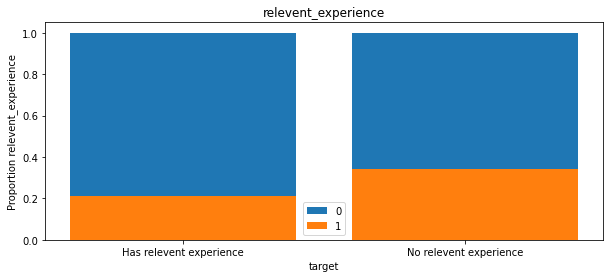

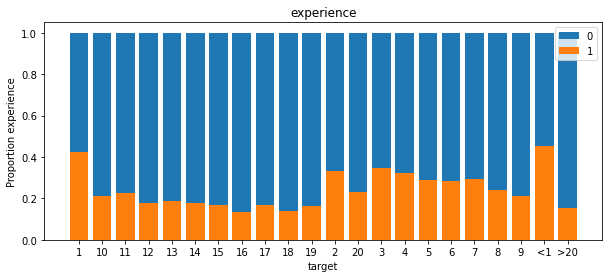

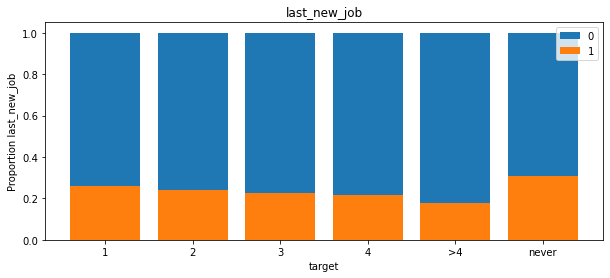

In [ ]:
for i in ['relevent_experience','experience','last_new_job']:
    ct=pd.crosstab(df[i],df['target'],normalize='index').sort_index()
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(10,4))
    plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct[1])
    plt.xlabel('target')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    plt.show()

In [ ]:
for i in ['relevent_experience','experience','last_new_job']:
    fig=px.sunburst(df,path=[i,'target'],color='target', title=f'Proporsi Target Berdasarkan {i}')

    fig.show()

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:
* Kandidat mana yang memiliki minat pindah kerja lebih tinggi, yang pengalaman kerja relevan atau tidak memiliki pengalaman kerja relevan?
    * kandidat tanpa pengalaman yang relevan justru lebih ingin pindah
* Kandidat yang memiliki pengalaman berapa lama yang memiliki minat untuk pindah kerja?
    * kandidat dengan pengalaman kerja >20 tahun memiliki jumlah terbanyak, tapi kandidat-kandidat dengan pengalaman kerja yang kurang dari 10 tahun (3-7 tahun) yg lebih berminat pindah kerja secara proporsi.
* Bagaimana rentang waktu sejak kandidat terakhir pindah kerja mempengaruhi minat kandidat untuk pindah kerja?
    * kandidat yang baru pindah kerja (1 tahun) adalah yang paling banyak secara jumlah. Secara proporsi, grup ini dan grup yang belum pernah pindah tempat kerja (never) adalah yang paling berminat untuk pindah kerja. Kandidat yang telah bekerja >4 tahun di tempat dia sekarang bekerja memiliki minat pindah kerja paling rendah.

Dari analisis di atas, kita bisa melihat bahwa sepertinya kandidat yang sudah berpengalaman dan bekerja di satu tempat dengan waktu relatif lama, sudah nyaman dengan pekerjaannya sekarang dan tidak terlalu berminat untuk pindah.

Untuk `relevent_experience`, dari grafik, kandidat tanpa pengalaman relevan justru lebih minat untuk pindah kerja, kemungkinan besar ini adalah orang-orang yang ingin berpindah karir. Sekarang, mari kita cek secara statistik, apakah proporsi kandidat yang ingin pindah kerja memang secara signifikan lebih rendah pada kandidat dengan pengalaman kerja yang relevan dibanding kandidat dengan pengalaman kerja yang tidak relevan.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
df_ct=pd.crosstab(df['relevent_experience'],df['target'])

stats, pval=proportions_ztest(df_ct[1],df_ct.sum(axis=1),alternative='smaller')
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')


Tolak Ho


Dari hasil uji statistik, kita bisa melihat bahwa memang proporsi kandidat yang ingin pindah kerja memang secara signifikan **lebih rendah** pada kandidat dengan pengalaman kerja yang relevan dibanding kandidat dengan pengalaman kerja yang tidak relevan.



## Berdasarkan perusahaan asal Kandidat
Sekarang, mari kita menganalisa minat kandidat untuk pindah kerja berdasarkan karakteristik perusahaan asal kandidat, yaitu berdasarkan fitur `company_size` dan `company_type`.  
Kita akan mencoba mencari tahu *dari perusahaan seperti apa kandidat yang berminat untuk pindah kerja berasal*, terutama dibandingkan dengan kandidat yang tidak ingin pindah kerja?



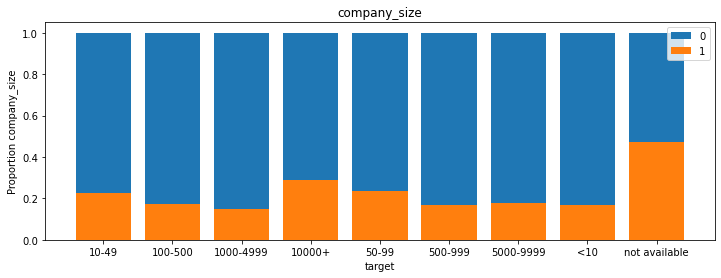

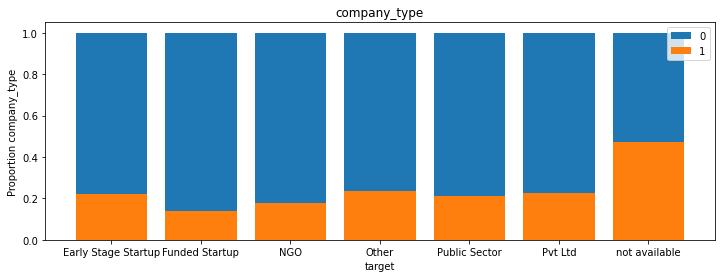

In [ ]:

for i in ['company_size', 'company_type']:
    ct=pd.crosstab(df[i],df['target'],normalize='index').sort_index()
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(12,4))
    plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct[1])
    plt.xlabel('target')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    plt.show()

In [ ]:
for i in ['company_size', 'company_type']:
    fig=px.sunburst(df,path=[i,'target'],color='target', title=f'Proporsi Target Berdasarkan {i}')
    fig.show()

Kandidat dengan data 'company_size' dan 'company_type' not available secara proporsi paling berminat untuk pindah kerja. Kalau diingat, mereka merupakan kandidat yang sedang berkuliah full time, sehingga kemungkinan besar memang sedang tidak bekerja dan sedang mencari pekerjaan. Hasil ini sejalan dengan analisis sebelumnya yang menunjukkan bahwa kandidak yang sedang berkuliah adalah yang paling berminat pindah kerja.  

Secara jumlah, kebanyakan kandidat berasal dari perusahaan dengan company_type(PVt Ltd), dan company_size kecil (50-500), diikuti oleh perusahaan berukuran besar (10.000+)

## Berdasarkan Gender
Terakhir, mari kita analisis minat kandidat untuk pindah kerja berdasarkan gender. Apakah ada gender berpengaruh terhadap minat kandidat untuk pindah kerja?  

Sebagai catatan, dalam melakukan analisa terkait gender, kita perlu berhati-hati agar kebijakan yang dihasilkan tidak diskriminatif.

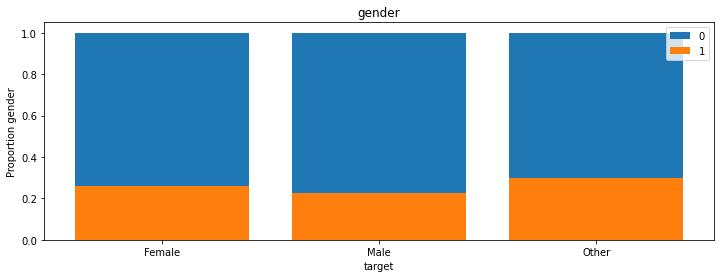

In [ ]:
ct=pd.crosstab(df['gender'],df['target'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)
plt.figure(figsize=(12,4))
plt.bar(np.arange(df['gender'].nunique()),ct['total'])
plt.bar(np.arange(df['gender'].nunique()),ct[1])
plt.xlabel('target')
plt.ylabel(f'Proportion gender')
plt.legend([0,1])
plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('gender')
plt.show()

In [ ]:
fig=px.sunburst(df,path=['gender','target'],color='target',, title=f'Proporsi Target Berdasarkan gender')
fig.show()

In [ ]:
df_ct= pd.crosstab(df['gender'],df['target'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Dari grafik, kita bisa melihat bahwa mayoritas dari kandidat memiliki gender *male*, tetapi secara proporsi, gender *male* justru memiliki minat pindah kerja paling rendah, dibanding gender *female* dan *other*. Hasil uji dengan *chi square* juga mengkonfirmasi bahwa gender memiliki pengaruh terhadap minat kandidat untuk pindah kerja.

# Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, kita bisa membuat kesilpulan berikut tetang kandidat yang ingin direkrut:
* Dari 19,158 data yang kita miliki, hanya 4421 data berasal dari kandidat yang berminat untuk pindah kerja.
* Kandidat paling banyak berasal dari city_103 dan city_21
* Kebanyakan kandidat sedang tidak berkuliah, merupakan lulusan jurusan STEM dengan tingkat pendidikan *graduate*
* berdasarkan pengalaman bekerja, kebanyakan kandidat memiliki pengalaman kerja yang berhubungan dengan data dan pengalaman kerja lebih dari 20 tahun.
* Mayoritas kandidat berasal dari perusahaan swasta (Pvt Ltd) dan perushaan kecil (50-500 karyawan)
* Kebanyakan kandidat memiliki gender *male*


Karakteristik kandidat yang ingin pindah pekerjaan, terutama dibandingkan peserta yang tidak ingin pindah bekerja, adalah sebagai berikut:

* Mayoritas berasal dari city_21, secara keseluruhan, berasal dari kota dengan CDI lebih rendah dibanding yang berminat pindah.
* Biasanya sedang berkuliah full time dan memiliki tingkat pendidikan *graduate*
* baru lulus atau baru pindah tempat kerja (~1 tahun) dengan total pengalaman kerja sedang (3-6 tahun) dan pengalaman  yang kurang relevan dengan data science.
* Gender *female* atau *other*

**Rekomendasi**
1. Perekrutan bisa dilakukan lebih aktif di kota-kota dengan CDI yg lebih rendah (0.7, dibanding 0.9). City_21 bisa menjadi salah satu kota yang diutamakan dalam perekrutan.
    * Akan lebih baik apabila kita bisa menambahkan data kandidat dari kota selain city_103 dan city_21 untuk memastikan bahwa kesimpulan di atas valid
2. Utamakan kandidat yang baru/akan lulus, dengan tingkat pendidikan *graduate*, dari jurusan apa saja.
3. Cari kandidat yang belum lama pindah kerja
    * Akan lebih baik kita melakukan analisis lebih mendalam pada kelompok ini, kenapa mereka ingin pindah kerja lagi, karena tentunya kita ingin karyawan yang nantinya akan bekerja cukup lama di perusahaan kita.
4. Fokus pada kandidat yang sedang ada di fase awal-menengah pada karirnya (3-6 tahun pengalaman kerja)
5. Beri kesempatan pada kandidat yang tidak punya pengalaman yang relevan.
6. Jangan jadikan gender sebagai syarat perekrutan.

Dengan mempersempit *pool* perekrutan kandidat, diharapkan analisis ini bisa membantu perusahaan untuk mengurangi ongkos dan waktu training, meningkatkan kualitas dan membantu dalam mengelompokkan kandidat dalam training.